In [4]:
%%markdown
A función escollida é:

f(x)=tanh(x)=(e^x−e^−x)/(e^x+e^-x)

Esta función representa a ecuacón da tanxente hiperbólica. Preténdese buscar unha raíz da función, é dicir un punto no que f(x)=0. O intervalo escollido para atopar a raíz é o [-2,2]. 

A función da tanh aparece en diversos campos da física e da enxeñaría nos que destacan problemas de modelización de sistemas con transicións suaves entre dous estados, como en circuitos electrónicos. Resolver a ecuación tanh(x)=0 é fundamental para determinar os puntos de equilibrio nestes sistemas.


A función escollida é:

f(x)=tanh(x)=(e^x−e^−x)/(e^x+e^-x)

Esta función representa a ecuacón da tanxente hiperbólica. Preténdese buscar unha raíz da función, é dicir un punto no que f(x)=0. O intervalo escollido para atopar a raíz é o [-2,2]. 

A función da tanh aparece en diversos campos da física e da enxeñaría nos que destacan problemas de modelización de sistemas con transicións suaves entre dous estados, como en circuitos electrónicos. Resolver a ecuación tanh(x)=0 é fundamental para determinar os puntos de equilibrio nestes sistemas.


In [2]:
%%markdown 
Antón Pena Blanco

Antón Pena Blanco


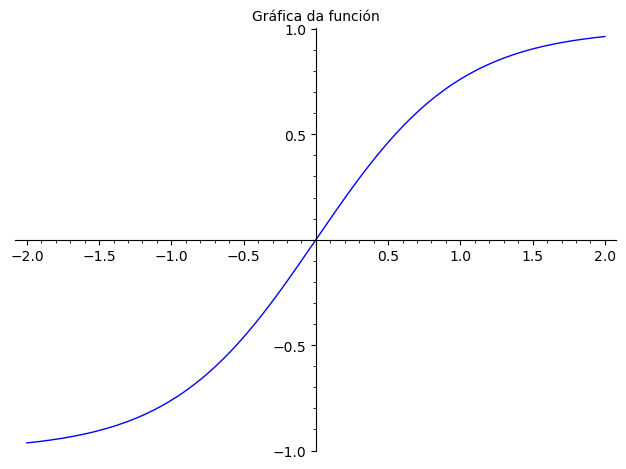

In [3]:
f(x) = (e^x-e^-x)/(e^x+e^-x)
a=-2
b=2
plot(f,a,b,title='Gráfica da función')

In [15]:
def dicotomia(f, a, b, xtol=1e-12, rtol=1e-14):
    """DICOTOMIA    Calculo de raices por dicotomia."""
    r = a
    k = 0
    v = []
    I = []
    # comprobacions previas
    if abs(f(a)).n() < rtol:
        r = a.n(); return r,k,v,I
    elif abs(f(b)).n() < rtol:
        r = b.n(); return r,k,v,I
    elif (f(a)*f(b)).n() > 0:
        raise RuntimeError('Extremos de igual signo.')
    # calculo iterativo
    while abs(b - a) > xtol:
        r = (a + b).n() / 2
        k = k + 1
        v.append(r)
        I.append((a,b))
        if abs(f(r)).n() < rtol:
            return r,k,v,I
        elif (f(a)*f(r)).n() < 0:
            b = r
        else:
            a = r
    return r,k,v,I

In [19]:
dicotomia(f, a, b)[0:2]

(0.000000000000000, 1)

In [20]:
def debuxa_dicotomia(f, a, b, v, I):
    """DEBUXA_DICOTOMIA    Visua
    liza intervalos de dicotomía."""
    p = plot(f, a, b) + point(zip(v,[0]*len(v)), color='green')
    h = (p.ymax() - p.ymin())/(1.5*len(v))
    show(sum(line([(a,h*i),    (b,h*i)],     color='green') + \
             line([(a,h*i-h/4),(a,h*i+h/4)], color='green') + \
             line([(b,h*i-h/4),(b,h*i+h/4)], color='green')   \
             for i, (a,b) in enumerate(I)) + p, xmin=a, xmax=b)

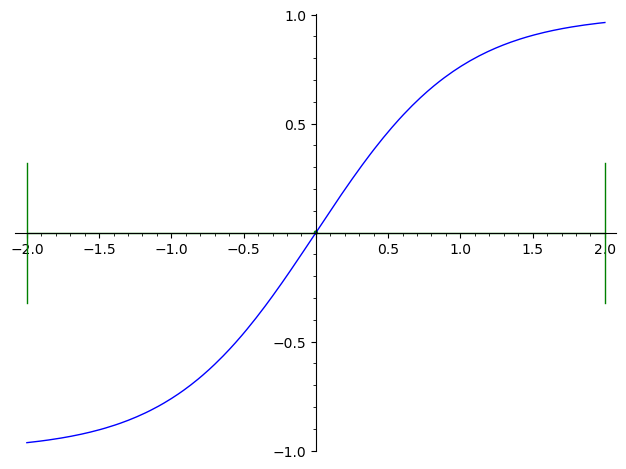

In [21]:
 _,_,v,I = dicotomia(f, a, b)
debuxa_dicotomia(f, a, b, v, I)

In [22]:
kmax = lambda a, b, xtol: ceil(log( (b-a)/xtol, 2))
kmax(a, b, 1e-12)

42

In [24]:
%%markdown
O número de iteracións é 1 mentres que o número máximo é 42 polo que é correcto

O número de iteracións é 1 mentres que o número máximo é 42 polo que é correcto


In [25]:
def newton(f, df, x0, xtol=1e-12, rtol=1e-14, M=100, errorM=True):
    """NEWTON    Calculo de raices por Newton."""
    v = [x0.n()]
    for k in range(M):
        dfx = df(v[k]).n()
        if abs(dfx) < rtol:
            raise RuntimeError('Derivada nula.')
        r = (v[k] - f(v[k]) / dfx).n()
        v.append(r)
        # test de parada
        if abs(r-v[k]) < xtol or abs(f(r)).n() < rtol:
            return r, len(v), v
    if errorM: raise RuntimeError('Excedido numero maximo de iteracions.')
    return r, len(v), v

In [29]:
newton(f, diff(f), 1)

(-5.47522097105180e-18,
 7,
 [1.00000000000000,
  -0.813430203923509,
  0.409402316583386,
  -0.0473049164556158,
  0.0000706028036445636,
  -2.34706622626729e-13,
  -5.47522097105180e-18])

In [30]:
def debuxa_newton(f, a, b, v):
    """DEBUXA_NEWTON    Visualiza tanxentes do metodo de Newton."""
    show(plot(f, a, b) + point(zip(v,[0]*len(v)), color='green') + \
    sum(line([(v[i],0),(v[i],f(v[i]))], color='green', linestyle='--') for i in range(len(v))) + \
    sum(line([(v[i-1],f(v[i-1])), (v[i],0)], color='green') for i in range(1,len(v))), xmin=a, xmax=b)

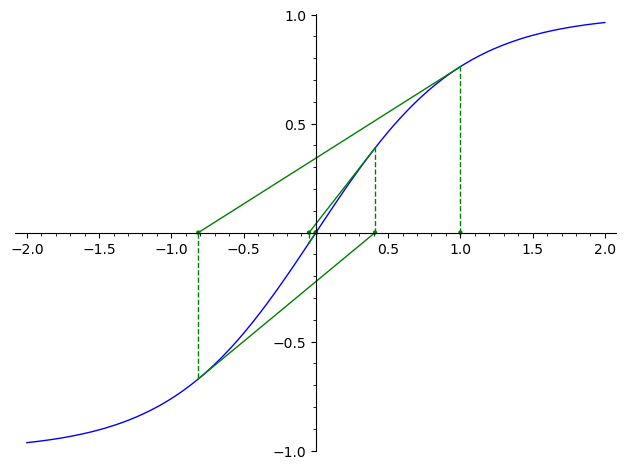

In [31]:
_,_,v = newton(f, diff(f), 1)
debuxa_newton(f, a, b, v)

In [32]:
def coef_newton(f, a, b, v):
    """COEF_NEWTON    Calcula os coeficientes de converxencia de Newton."""
    alpha = find_root(f, a, b, xtol=9.e-16, rtol=9.e-16) #aproximamos "ao máximo" a raíz
    pts = []
    for k in range(len(v)-1):
        if (alpha - v[k])^2 > RDF.epsilon():
            pts.append( (k, abs(alpha - v[k+1]) / (alpha - v[k])^2 ) )
    return line(pts, marker = '.', title='$C_k$ obtidos')

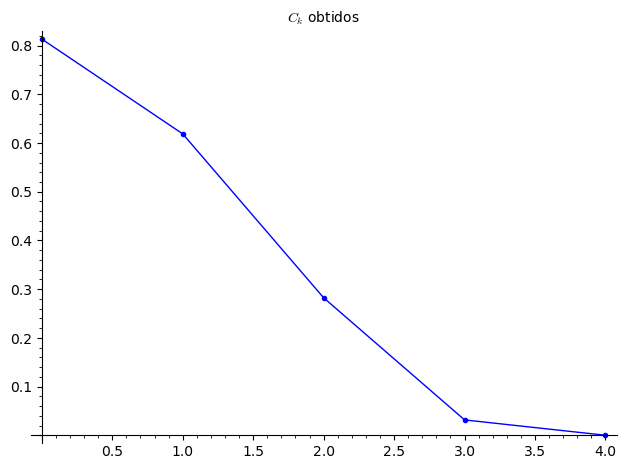

In [33]:
coef_newton(f, a, b, v)

In [0]:
Xa que os coeficientes converxen asintóticamente a medida que aumenta k, podemos confirmar que ten converxencia cuadrática.


#### **CORRECCIÓN**



**Criterios de correccción:**

   A corrección divídese en tres partes diferentes cada un puntuado sobre 0,7 puntos. Debido a isto a nota final da resolución será a media da corrección das tres partes:

 **· Presentación:** Puntúanse os tres primeiros apartados do traballo.
 
 **· Dicotomía:** Puntúanse os apartados que van do catro ao sete incluídos.
 
 **· Newton:**  Puntúanse os últimos catro apartados do traballo.
 
 Para a corrección de cada un dos apartados débese ter en conta que non se exceda do máximo de liñas establecido para cada un dos apartados, no caso de excederse ese número a puntuación será de 0 puntos.



**Presentación:**

Os puntos a analizar son:
1. Enunciado final do traballo.
2. Nome da persoa que realiza a resolución
3. Código para definir a función.

O enunciado do traballo está  correcto xa que é o mesmo que hai no campus virtual. Pero ten un problema houbo un comentario na proposta do enunciado para engadir información da función, así como un enlace a un artigo e este comentario non aparece reflexado no enunciado. Aínda así ao non ser un cambio que modifique a resolución do exercicio non se quitará puntuación. Tamén aparece o nome da persoa que resolve o traballo e a función está definida correctamente polo que tamén obten toda a puntuación.  Pola contra, as celas nas que aparece o texto son tipo *code*, non tipo *text*. 

Debido a este último erro a puntuación deste apartado é de **0,6/0,7**.

**Dicotomía:**

Os puntos a analizar son:
    
   4. Código para calcular a raíz por dicotomía que só devolva a aproximación da raíz e o número de iteracións.

   5. Código para crear a gráfica dos iterantes de dicotomía e os intervalos encaixados no intervalo de traballo.

   6. Código para calcular o número máximo de iterantes.

   7. Texto xustificando se o número de iteracións na práctica é coherente co número máximo de iterantes.

O código para calcular a raíz é correcto, xa que mostra o número de interaccions, o numero de iterantes e cumpre co máximo de liñas. O código de debuxar os iterantes tamén é correcto e cumpre co máximo de liñas. O apartado que xustifica o número de iterantes está resolto de maneira correcta. E o texto xustificando se é coherente este máximo co numero de interracción tamén é correcto. Pero neste apartado hai un grave problema o código das funcións dicotomía e debuxa_dicotomia deberían estar despois da resolución do traballo e non no medio da resolució polo que réstanse 0,1 puntos. Ademais o texto segue sen estar en celas tipo *text* polo tanto  réstanse outros 0,05 puntos á ùntuación deste apartado. 

A nota deste apartado é de **0.55/0.7**.

**Newton:**

Os puntos a analizar son:
   
   8. Código para calcular da raíz por Newton que só devolva a aproximación da raíz e o número de iteracións.
   
   9. Código para crear a gráfica de todos os iterantes de Newton e as tanxente do método.
   
   10. Código para crear a gráfica das constantes de converxencia, C_k.
   
   11. Texto xustificando se se dá a converxencia cuadrática neste caso .


O código para calcular a raíz por Newton é correcto pero non devolve só a aproximación e número de interaccións, devolve todas as aproximacións feitas, para que non ocorrese isto deberíase poñer [0:2]  ao lado da intstrucción. Por isto réstanse 0,05 puntos. En cambio os outros 3 apartados están correctos. Neste caso igual que no anterior as funcións non están no final do traballo polo que quítanse 0,05 puntos por cada unnha delas, en total 0,1 puntos. Ademáis volven a non usarse celas tipo *text* polo que se quitan outros 0,05 puntos. 

A puntuación deste apartado será de **0,5/0,7** puntos

Facendo a media aritmética de cada unha das 3 notas a nota final da resolución da como resultado **0,55/0,7** puntos